<a href="https://colab.research.google.com/github/tomiokario/MNIST_numeric_classifier/blob/master/MNIST_classifier1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# feedforward neural networkによるMNIST手書き文字分類




## モデルの構築

In [24]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

#ヘルパーのライブラリ読み込み。画像を表示する場合に利用します。
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data() # データロード

In [25]:
# データスケール変換: (28*28)→(784)
x_train = x_train.reshape(60000, 784) 
x_test = x_test.reshape(10000, 784) 

In [26]:
# データの正規化
x_train = x_train / 255.
x_test = x_test / 255.

In [27]:
# ラベルデータの変換
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [28]:
from tensorflow.keras.models import Sequential
model = Sequential()

In [29]:
from tensorflow.keras.layers import Dense

model.add(
    Dense(
        units=64,
        input_shape=(784,),
        activation='relu'
    )
)

In [30]:
model.add(
    Dense(
        units=10,
        activation='softmax'
    )
)

In [31]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## モデルの学習

In [32]:
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=20,
    validation_split=0.2
)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3352 - accuracy: 0.9049 - val_loss: 0.1868 - val_accuracy: 0.9481
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1615 - accuracy: 0.9527 - val_loss: 0.1461 - val_accuracy: 0.9572
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1173 - accuracy: 0.9655 - val_loss: 0.1208 - val_accuracy: 0.9645
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0928 - accuracy: 0.9722 - val_loss: 0.1053 - val_accuracy: 0.9697
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0758 - accuracy: 0.9773 - val_loss: 0.1039 - val_accuracy: 0.9693
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0635 - accuracy: 0.9816 - val_loss: 0.0953 - val_accuracy: 0.9712
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0537 - accuracy: 0.9836 - val_loss: 0.1007 - val_accuracy:

## モデルの評価

検証用データを用いてモデルの正解率を評価する

In [33]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9735999703407288


## モデルによる予測


予測したいテストデータのidを指定

In [39]:
id=15

最も可能性の高い数字とその確率を出力

In [40]:
np.argmax(predictions[id])

5

In [41]:
max(predictions[id])

0.9999994

### 正解の確認

正解(ラベル)を確認

In [42]:
np.argmax(y_test[id])

5

正解(画像)を確認

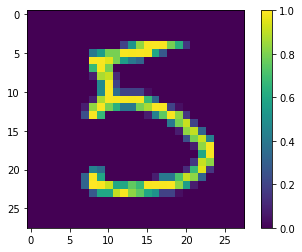

In [43]:
x_test_image = x_test[id].reshape(28, 28) 

plt.figure()
plt.imshow(x_test_image)
plt.colorbar()
plt.grid(False)
plt.show()